# What are the main drivers of the level of damage ? 

The goal of this part is to determine which variable explains the level of damage as an output of the damage function. To do so, we will proceed to an econometric regression of the level of damage by other explanatory variables. 

The general idea is that the quantitative level of damage given by the model is driven by multiple factors : 

- physical drivers, such as the level of climate change (temperature change, radiative forcing, etc.)
- methodological drivers, such as the choice of this or that modelling choice
- ethical drivers, such as the way spatial, social or generational equities are represented

In order to quantitatively assess the role of each factor in the model, we will perform linear regressions, in which the level of damage is assumed to be explained by a set of explanatory variables. These explanatory variables have been choosen or designed to be representative of one of the above mentionned choices. 

The general form is the following : 

$$


\begin{align*}
\text{damage} = & \ \beta_0  + \underbrace{\beta_1 \cdot \text{temperature} + \beta_2 \cdot \text{radiative forcing}}_\text{Physical variables}  + \underbrace{\beta_3 \cdot \text{equation}}_\text{Methodological variables} \\
& + \underbrace{\beta_1 \cdot \text{exponent} + \beta_2 \cdot \text{normalisation constant} + \beta_2 \cdot \text{discount rate} + \beta_2 \cdot \text{social parameter}}_\text{Ethical variables}  + \epsilon
\end{align*}

$$

where:
- $\text{damage}$ is the level of damage
- $\beta_0$ is the intercept term
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients of the variables
- $\text{exponent}, \text{normalisation constant}, \ldots, \text{temperature}$ are the independent variables
- $\epsilon$ is the error term


The form of the damage functions in the model is : 

$$

D_{t,r} = f(\text{temperature}, \text{other drivers})_{t,r} \cdot GDP_{t,r} \cdot (\frac{y_{t,r}}{y_0})^\alpha

$$

$$

\text{Total damage} = \sum D_{t,r}

$$

### Preparation of the data

In [112]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

xr.set_options(display_expand_attrs=False, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

In [113]:
# This cell stores the variables for the rest of the script, so it is easier to change if needed
data_file_path = '../../../results/batch/run_ds_18_07.nc'

First, we have to load the data that came as an output of the model. Variables of interest are stored in a netcdf file (.nc), that we will load as a dataset, and convert to a pandas dataframe. 

In [114]:
variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_eq_total_deaths',
       'fund_tot_eq_fund_total_impact', 'fund_tot_total_damage',
       'witness_tot_eq_witness_total_impact', 'time',
       'temperature_change', 'total_population', 'extra_extra_exponent',
       'extra_extra_normalisation_constant', 'extra_extra_gdp_modifyer',
       'total_radiative_forcing', 
       'gross_domestic_product_nominal', 'population_35_regions', 
       'average_disposable_income_per_capita']

damage_variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_total_damage',
       'fund_tot_eq_fund_total_impact', 'witness_tot_eq_witness_total_impact']      

ds = xr.open_dataset(data_file_path)
df = ds[variables].to_dataframe().reset_index()
df = df.rename(columns={'extra_extra_gdp_modifyer': 'coef'})


We now have a dataframe : 

In [115]:
df

,Run,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_monetary_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,coef,total_radiative_forcing,gross_domestic_product_nominal,population_35_regions,average_disposable_income_per_capita
0,0,2005.0,AUSTRIA,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,0.845000,6.541007e+09,-2.120837,14345.919289,inf,1.714491,3.786850e+05,8.253656e+06,0.000000
1,0,2005.0,BELGIUM,4.552596e+02,5.499544e+02,0.0,1.379671e+09,5.746519e+06,1.379671e+09,4.973581e+06,9.292477e+02,0.845000,6.541007e+09,-2.120837,14345.919289,0.484972,1.714491,4.580816e+05,1.054688e+07,24767.399895
2,0,2005.0,BULGARIA,3.365703e+02,4.065775e+02,0.0,2.799410e+08,5.009851e+01,2.799410e+08,8.615126e+05,6.869865e+02,0.845000,6.541007e+09,-2.120837,14345.919289,3.328578,1.714491,4.934207e+04,7.686964e+06,4290.060541
3,0,2005.0,CROATIA,1.805931e+02,2.181568e+02,0.0,2.565073e+08,2.853332e+01,2.565073e+08,1.519235e+06,3.686154e+02,0.845000,6.541007e+09,-2.120837,14345.919289,1.784685,1.714491,4.937873e+04,4.378066e+06,7565.730576
4,0,2005.0,CYPRUS,3.437053e+01,4.151966e+01,0.0,9.993271e+07,5.360278e+05,9.993271e+07,3.055627e+06,7.015501e+01,0.845000,6.541007e+09,-2.120837,14345.919289,0.828186,1.714491,2.025158e+04,1.027657e+06,15217.411656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29395,14,2060.0,INDIA,1.082256e+05,5.521826e+04,0.0,1.097148e+10,2.813391e+04,1.097148e+10,1.846274e+05,9.751358e+04,2.301589,8.386047e+09,-2.424749,21416.325501,0.746499,4.301696,4.027580e+06,1.541035e+09,742.585934
29396,14,2060.0,LATAM,2.632613e+05,1.343197e+05,0.0,3.113982e+10,4.678880e+03,3.113982e+10,2.172643e+06,2.372041e+05,2.301589,8.386047e+09,-2.424749,21416.325501,0.912993,4.301696,8.010561e+06,4.004570e+08,10750.534066
29397,14,2060.0,RUSSIA,5.946163e+05,3.033819e+05,0.0,2.869332e+10,6.452855e+02,2.869332e+10,1.450490e+07,5.357622e+05,2.301589,8.386047e+09,-2.424749,21416.325501,1.053842,4.301696,1.567490e+07,1.373280e+08,72197.949740
29398,14,2060.0,USMCA,3.108425e+06,1.585964e+06,0.0,1.075003e+11,4.163049e+03,1.075003e+11,1.982213e+07,2.800758e+06,2.301589,8.386047e+09,-2.424749,21416.325501,1.078673,4.301696,8.005607e+07,4.746416e+08,98352.078177


### Cleaning the dataset from coef outliers

We now compute the spatial equity coefficient, which takes the form : 

$$ \text{coef} = (\frac{y_{t,r}}{y_0})^\beta $$

<Axes: xlabel='gross_domestic_product_nominal', ylabel='coef'>

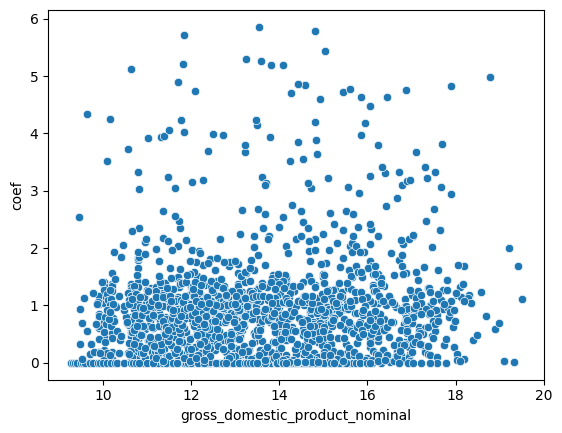

In [116]:
sns.scatterplot(data=df[df['coef']<6], y='coef', x=np.log(df['gross_domestic_product_nominal']))

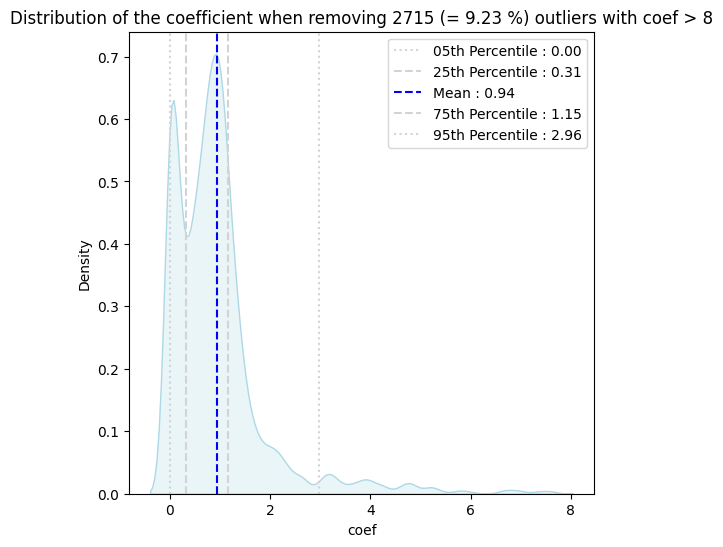

In [117]:
fig, ax = plt.subplots(figsize=(6, 6))

original_shape = df.shape[0]
coef_threshold = 8
df_outliers = df[df['coef'] > coef_threshold]
df = df[df['coef'] < coef_threshold]
sns.kdeplot(data=df, x='coef', ax=ax, color='lightblue', fill=True)

plt.axvline(df['coef'].quantile(0.05), color='lightgrey', linestyle='dotted', label=f'05th Percentile : {df["coef"].quantile(0.05):.2f}')
plt.axvline(df['coef'].quantile(0.25), color='lightgrey', linestyle='--', label=f'25th Percentile : {df["coef"].quantile(0.25):.2f}')
plt.axvline(df['coef'].mean(), color='blue', linestyle='--', label=f'Mean : {df["coef"].mean():.2f}')
plt.axvline(df['coef'].quantile(0.75), color='lightgrey', linestyle='--', label=f'75th Percentile : {df["coef"].quantile(0.75):.2f}')
plt.axvline(df['coef'].quantile(0.95), color='lightgrey', linestyle='dotted', label=f'95th Percentile : {df["coef"].quantile(0.95):.2f}')



plt.title(f'Distribution of the coefficient when removing {df_outliers.shape[0]} (= {100*df_outliers.shape[0]/original_shape:.2f} %) outliers with coef > {coef_threshold}')
plt.legend()
plt.show()

In [118]:
df_outliers

,Run,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_monetary_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,coef,total_radiative_forcing,gross_domestic_product_nominal,population_35_regions,average_disposable_income_per_capita
0,0,2005.0,AUSTRIA,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,0.845000,6.541007e+09,-2.120837,14345.919289,inf,1.714491,3.786850e+05,8.253656e+06,0.000000
14,0,2005.0,ITALY,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,0.845000,6.541007e+09,-2.120837,14345.919289,inf,1.714491,1.819230e+06,5.828121e+07,0.000000
18,0,2005.0,MALTA,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,0.845000,6.541007e+09,-2.120837,14345.919289,inf,1.714491,1.061692e+04,4.046590e+05,0.000000
19,0,2005.0,NETHERLANDS,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,0.845000,6.541007e+09,-2.120837,14345.919289,inf,1.714491,7.538307e+05,1.636715e+07,0.000000
22,0,2005.0,ROMANIA,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,0.845000,6.541007e+09,-2.120837,14345.919289,inf,1.714491,1.800128e+05,2.141729e+07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29313,14,2058.0,MALTA,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,2.240204,8.449800e+09,0.537827,34219.169393,inf,4.197934,1.003143e+05,3.324583e+05,0.000000
29314,14,2058.0,NETHERLANDS,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,2.240204,8.449800e+09,0.537827,34219.169393,inf,4.197934,8.140365e+06,1.471661e+07,0.000000
29317,14,2058.0,ROMANIA,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,2.240204,8.449800e+09,0.537827,34219.169393,inf,4.197934,1.222529e+06,1.268811e+07,0.000000
29319,14,2058.0,SLOVENIA,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,2.240204,8.449800e+09,0.537827,34219.169393,inf,4.197934,3.113583e+05,1.683859e+06,0.000000


We need to have all the damages in the same column to process to the regression : 

In [119]:
df_melted = df.melt(id_vars=['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'coef', 'Run', 'temperature_change', 'gross_domestic_product_nominal', 'average_disposable_income_per_capita'], var_name='equation',  value_vars=damage_variables, value_name='total_damage')

# Removing outliers equations 
df_melted = df_melted[~df_melted['equation'].isin(['fund_tot_total_damage', 'fund_tot_eq_fund_total_impact', 'fund_tot_eq_monetary_impact', 'dsk_tot_eq_dsk_total_impact'])] 

# Drop infinite values
infinites = df_melted[(df_melted['total_damage'] == np.inf) | (df_melted['total_damage'] == -np.inf)]
df_melted.replace([np.inf, -np.inf], np.nan, inplace=True)

df_melted


,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,Run,temperature_change,gross_domestic_product_nominal,average_disposable_income_per_capita,equation,total_damage
0,2005.0,BELGIUM,-2.120837,14345.919289,1.714491,0.484972,0,0.845000,4.580816e+05,24767.399895,define_tot_eq_define_total_impact,4.552596e+02
1,2005.0,BULGARIA,-2.120837,14345.919289,1.714491,3.328578,0,0.845000,4.934207e+04,4290.060541,define_tot_eq_define_total_impact,3.365703e+02
2,2005.0,CROATIA,-2.120837,14345.919289,1.714491,1.784685,0,0.845000,4.937873e+04,7565.730576,define_tot_eq_define_total_impact,1.805931e+02
3,2005.0,CYPRUS,-2.120837,14345.919289,1.714491,0.828186,0,0.845000,2.025158e+04,15217.411656,define_tot_eq_define_total_impact,3.437053e+01
4,2005.0,CZECH REPUBLIC,-2.120837,14345.919289,1.714491,1.306405,0,0.845000,1.862598e+05,10050.031677,define_tot_eq_define_total_impact,4.986509e+02
...,...,...,...,...,...,...,...,...,...,...,...,...
186790,2060.0,INDIA,-2.424749,21416.325501,4.301696,0.746499,14,2.301589,4.027580e+06,742.585934,witness_tot_eq_witness_total_impact,9.751358e+04
186791,2060.0,LATAM,-2.424749,21416.325501,4.301696,0.912993,14,2.301589,8.010561e+06,10750.534066,witness_tot_eq_witness_total_impact,2.372041e+05
186792,2060.0,RUSSIA,-2.424749,21416.325501,4.301696,1.053842,14,2.301589,1.567490e+07,72197.949740,witness_tot_eq_witness_total_impact,5.357622e+05
186793,2060.0,USMCA,-2.424749,21416.325501,4.301696,1.078673,14,2.301589,8.005607e+07,98352.078177,witness_tot_eq_witness_total_impact,2.800758e+06


<Axes: title={'center': 'Temperature change distribution'}, ylabel='Frequency'>

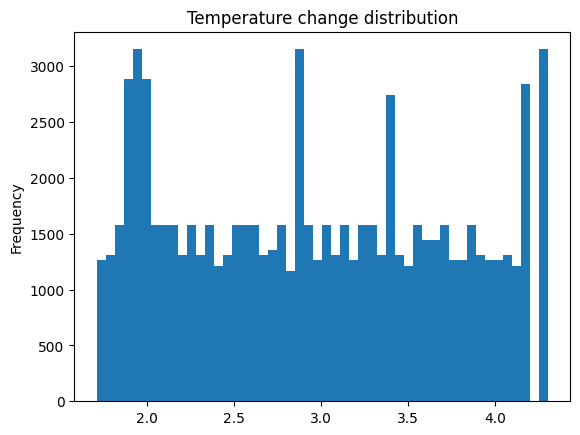

In [120]:
df_melted['total_radiative_forcing'].plot(kind='hist', bins=50, title='Temperature change distribution')

Here, we try to spot years that would be anormal.

In [121]:
df_2016 = df_melted[df_melted['time'] == 2015]
df_2016

,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,Run,temperature_change,gross_domestic_product_nominal,average_disposable_income_per_capita,equation,total_damage
325,2015.0,AUSTRIA,-0.452698,48486.425036,2.117411,0.000000,0,1.050761,3.786850e+05,0.000000,define_tot_eq_define_total_impact,0.000000
326,2015.0,BELGIUM,-0.452698,48486.425036,2.117411,0.427727,0,1.050761,4.580816e+05,25320.161597,define_tot_eq_define_total_impact,634.217873
327,2015.0,BULGARIA,-0.452698,48486.425036,2.117411,0.023408,0,1.050761,4.934207e+04,4481.498197,define_tot_eq_define_total_impact,3.738644
328,2015.0,CROATIA,-0.452698,48486.425036,2.117411,0.058584,0,1.050761,4.937873e+04,7742.439308,define_tot_eq_define_total_impact,9.363636
329,2015.0,CYPRUS,-0.452698,48486.425036,2.117411,0.181885,0,1.050761,2.025158e+04,15209.898854,define_tot_eq_define_total_impact,11.922954
...,...,...,...,...,...,...,...,...,...,...,...,...
185371,2015.0,INDIA,-0.913396,17151.313387,2.117411,0.001996,14,1.050761,2.073712e+06,1033.161498,witness_tot_eq_witness_total_impact,26.790780
185372,2015.0,LATAM,-0.913396,17151.313387,2.117411,0.039670,14,1.050761,3.228709e+06,6137.085294,witness_tot_eq_witness_total_impact,829.007924
185373,2015.0,RUSSIA,-0.913396,17151.313387,2.117411,0.045852,14,1.050761,1.391604e+06,6690.368533,witness_tot_eq_witness_total_impact,412.993969
185374,2015.0,USMCA,-0.913396,17151.313387,2.117411,0.622819,14,1.050761,2.091227e+07,31676.133804,witness_tot_eq_witness_total_impact,84301.638297


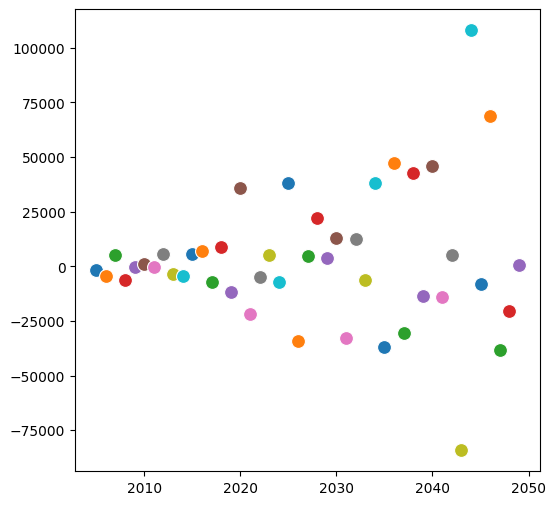

In [122]:
fig, ax = plt.subplots(figsize=(6, 6))

for year in range(2005, 2050):

    dif = df_melted.loc[df_melted['time'] == year+1, 'total_damage'].mean() - df_melted.loc[df_melted['time'] == year, 'total_damage'].mean()
    sns.scatterplot(x=[year], y=[dif], ax=ax, s=100, label=f'{year} - {year+1}', legend=False)



plt.show()

Since there is obviously something happening in 2015 and we do not understand why, we will remove the year 2015. 

In [123]:
#df_melted = df_melted[~df_melted['time'].isin([2015, 2043,  2048])]

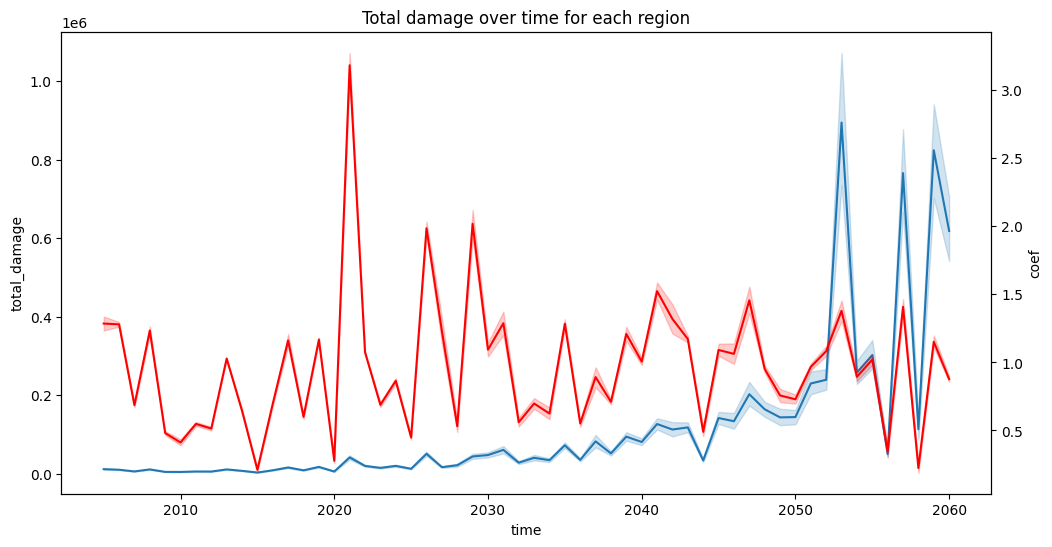

In [124]:
fig, ax = plt.subplots(figsize=(12, 6))


#df_melted_grouped_region = df_melted.groupby(['time', 'REGIONS 35 I']).mean().reset_index()
sns.lineplot(data=df_melted, x='time', y='total_damage', legend=True, estimator='mean', ax=ax)
ax2 = ax.twinx()
sns.lineplot(data=df_melted, x='time', y='coef', legend=True, estimator='mean', ax=ax2, color='red')

plt.title('Total damage over time for each region')
#ax.set_yscale('log')

plt.show()  

### Checking where and when the damages are the higher

This step serves to check irregularities in the experimental setup. 

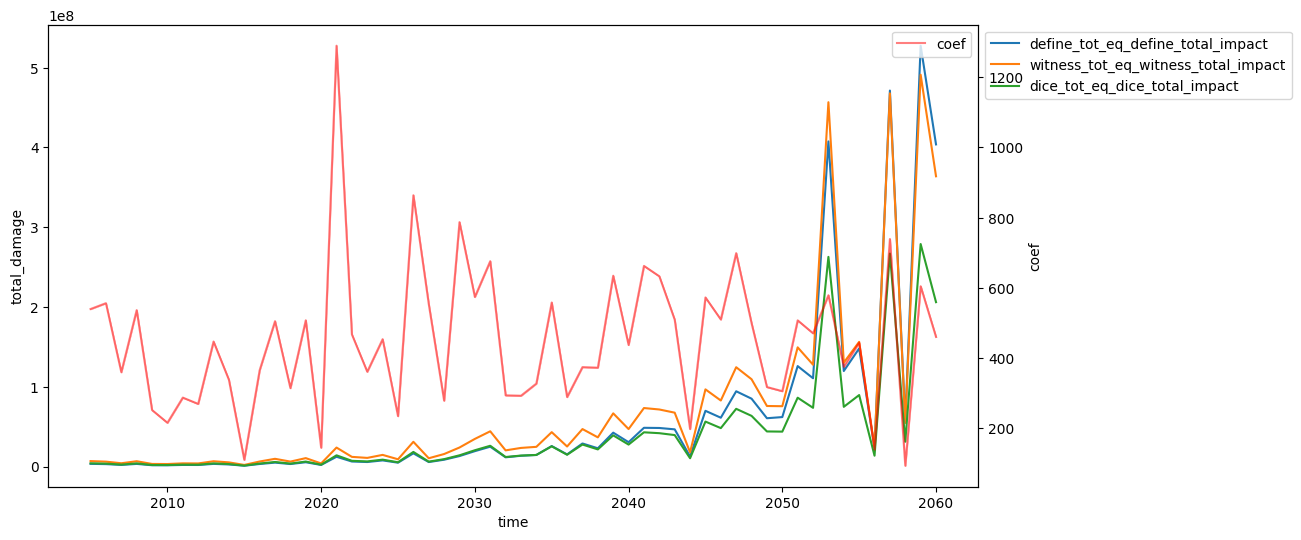

In [125]:


hd_country = df_melted.groupby(['time', 'total_radiative_forcing', 'equation']).sum().reset_index().sort_values(ascending=False, by='total_damage')

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=hd_country, x='time', y='total_damage', hue='equation', estimator='mean', ax=ax)

ax2 = ax.twinx()
sns.lineplot(data=hd_country, x='time', y='coef', label='coef', estimator='mean', ax=ax2, color='red', alpha=0.5)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [126]:
# Drop infinite values
infinites = df_melted[(df_melted['total_damage'] == np.inf) | (df_melted['total_damage'] == -np.inf)]
df_melted.replace([np.inf, -np.inf], np.nan, inplace=True)
infinites.size

0

## Preparing the regression

### With all variables, on a global level

In [127]:
# Group by time, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()
df_regression = df_regression.drop( columns=['REGIONS 35 I'])

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=True)

# Drop the null values
df_regression = df_regression.apply(pd.to_numeric, errors='coerce')
df_regression = df_regression.dropna()


df_regression

,time,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,Run,temperature_change,gross_domestic_product_nominal,average_disposable_income_per_capita,total_damage,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact
0,2005.0,-2.499737,37291.354076,1.714491,35.992621,364,23.660000,6.946382e+07,4.609016e+05,2.210159e+05,False,False
1,2005.0,-2.499737,37291.354076,1.714491,35.992621,364,23.660000,6.946382e+07,4.609016e+05,2.669876e+05,True,False
2,2005.0,-2.499737,37291.354076,1.714491,35.992621,364,23.660000,6.946382e+07,4.609016e+05,4.511240e+05,False,True
3,2005.0,-2.483093,48301.730067,1.714491,35.992621,224,23.660000,6.946382e+07,4.609016e+05,2.210159e+05,False,False
4,2005.0,-2.483093,48301.730067,1.714491,35.992621,224,23.660000,6.946382e+07,4.609016e+05,2.669876e+05,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2060.0,1.071663,33617.864179,4.301696,30.702805,35,80.555617,7.187911e+08,4.298371e+06,1.373452e+07,True,False
2516,2060.0,1.071663,33617.864179,4.301696,30.702805,35,80.555617,7.187911e+08,4.298371e+06,2.425469e+07,False,True
2517,2060.0,3.259974,18841.706602,4.301696,30.702805,385,80.555617,7.187911e+08,4.298371e+06,2.691910e+07,False,False
2518,2060.0,3.259974,18841.706602,4.301696,30.702805,385,80.555617,7.187911e+08,4.298371e+06,1.373452e+07,True,False


## Checking some hypothesis on the dataset

We want to check the colinearity of our variables. To do so, we compute the correleation matrix, which computes two by two the correlation between multiple variables. We then represent it in the shape of a heatamp.

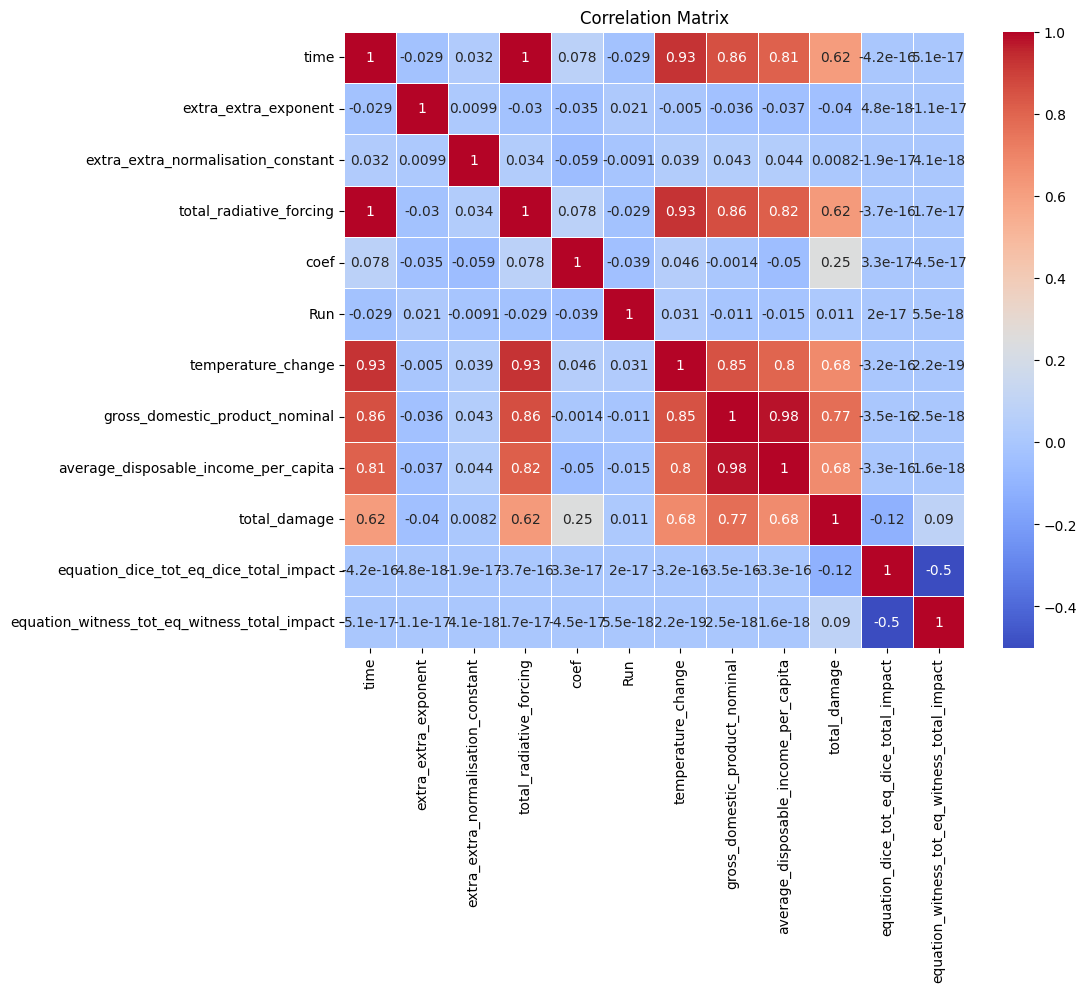

In [128]:
corr_matrix = df_regression.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We now want to visualize pair plots.

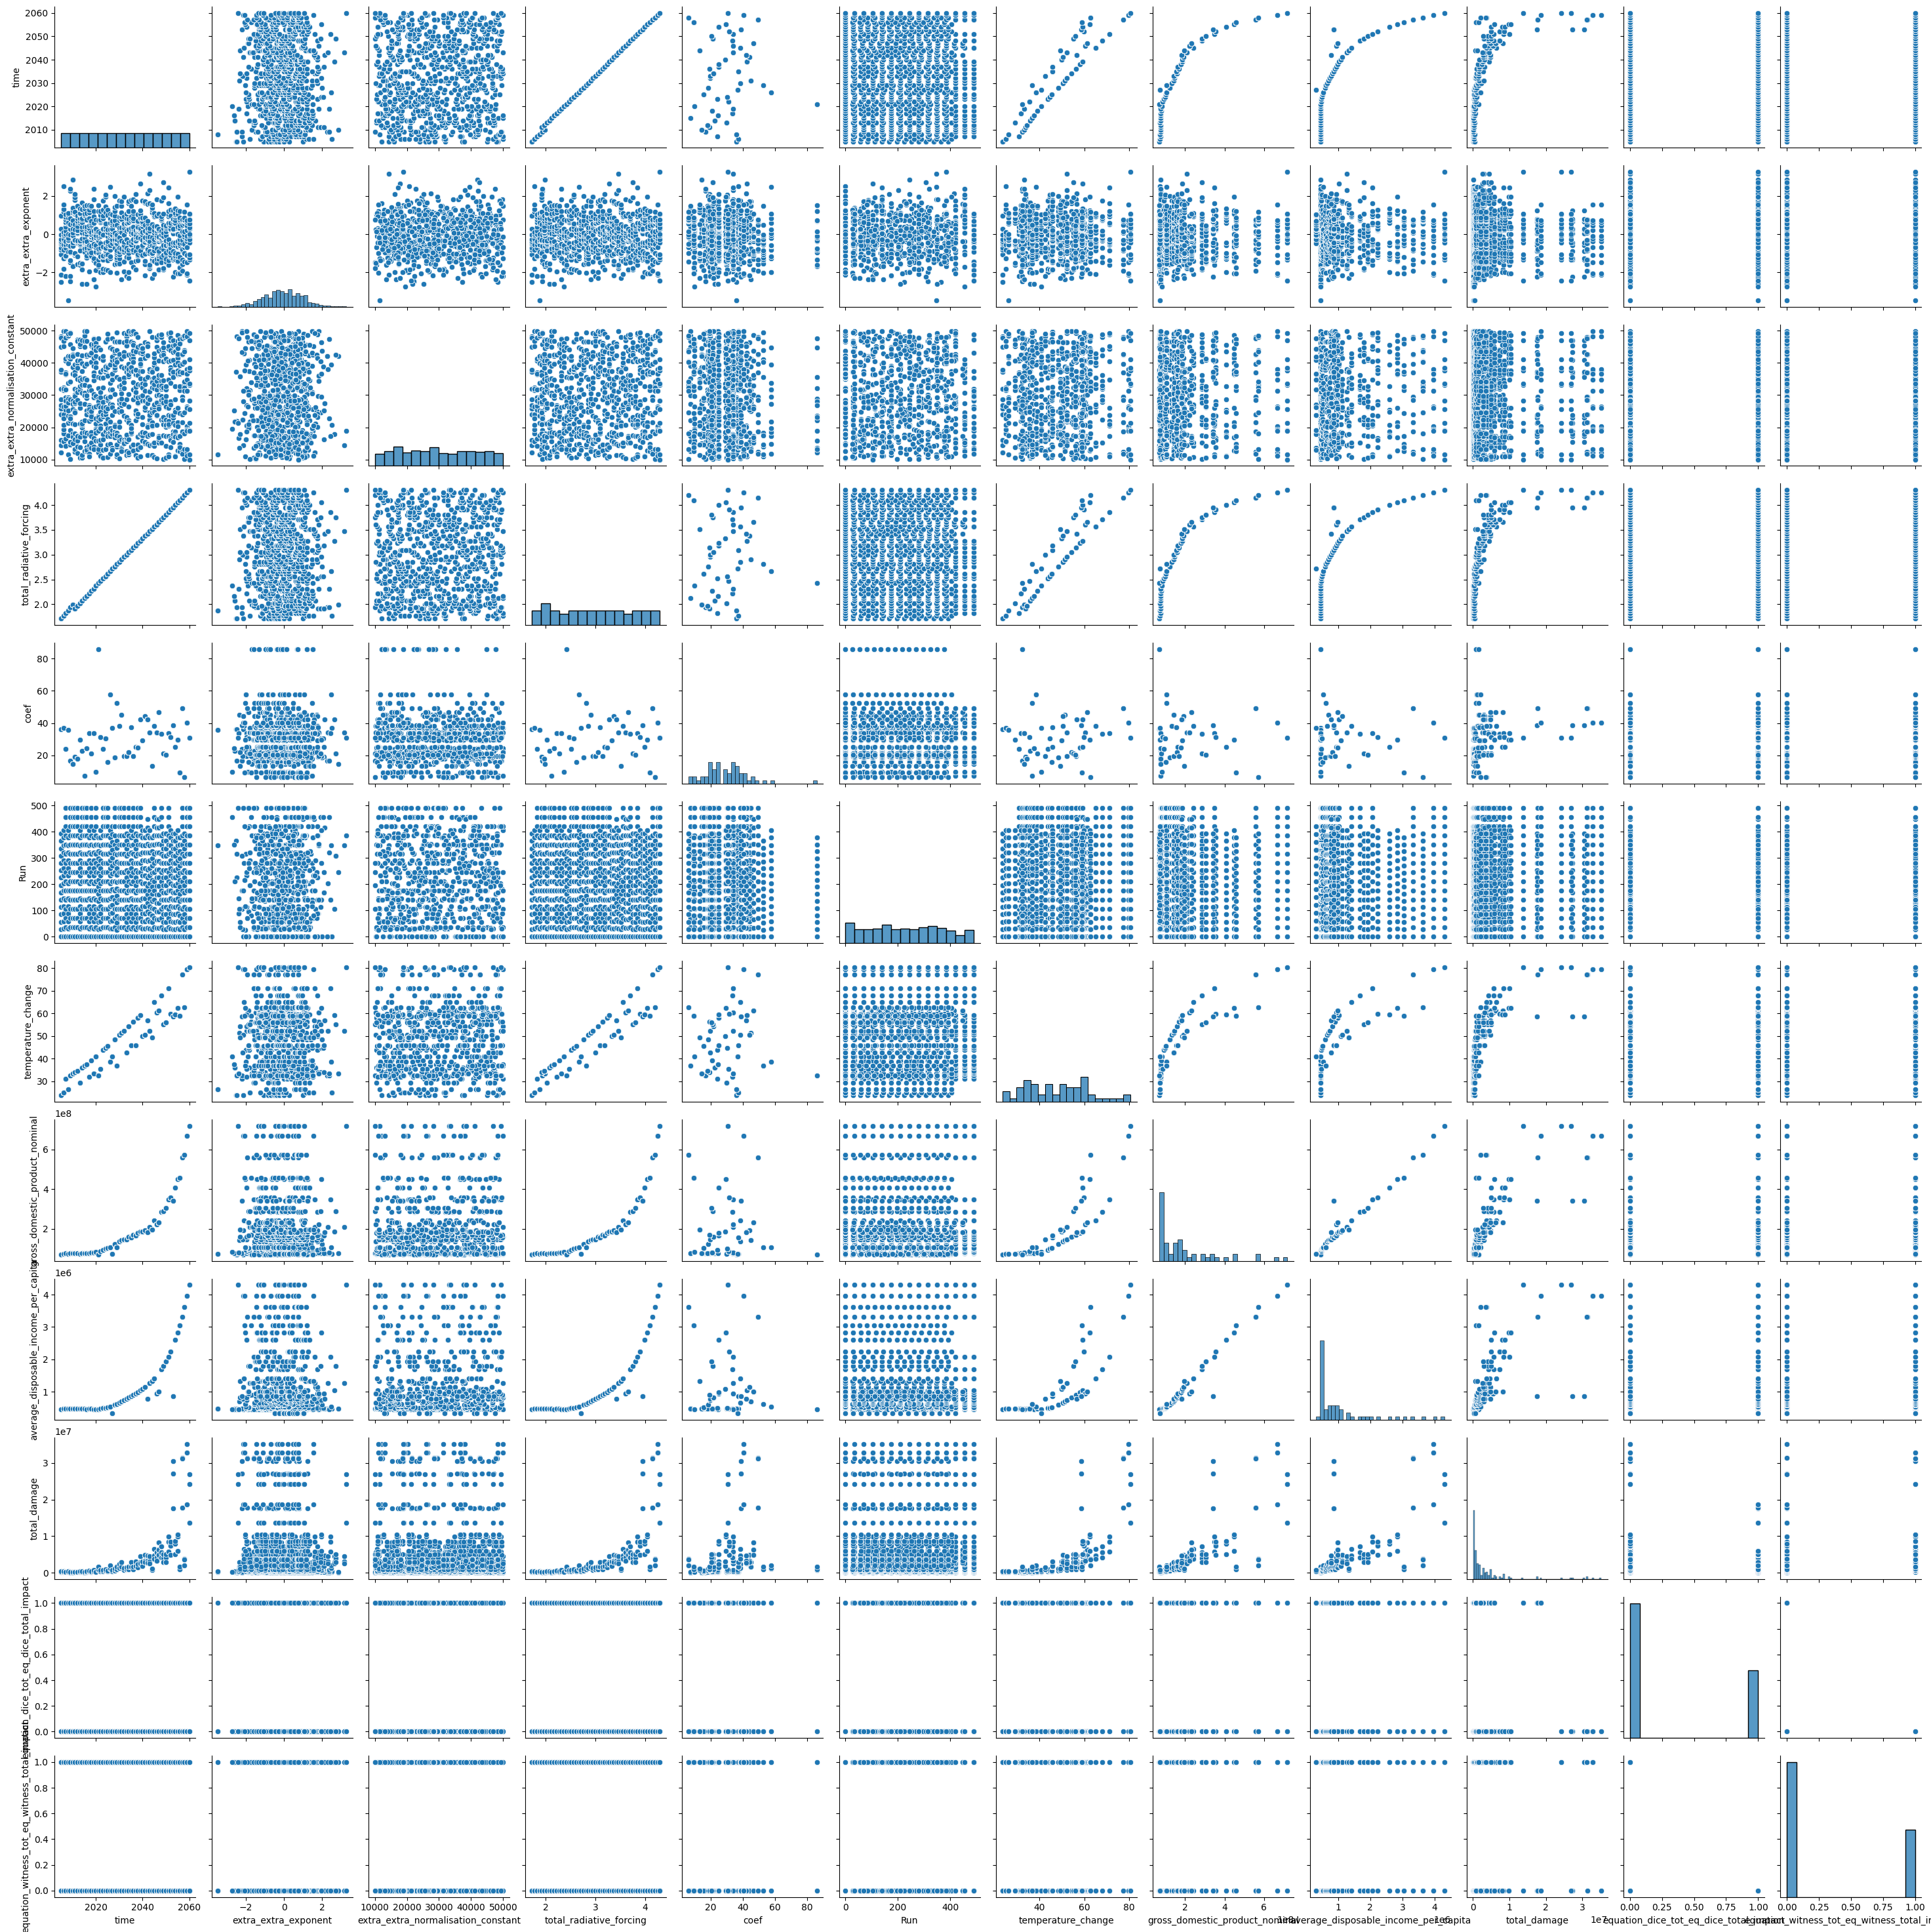

In [129]:
sns.pairplot(df_regression)

If we only do it with variables we have in the regressions : 

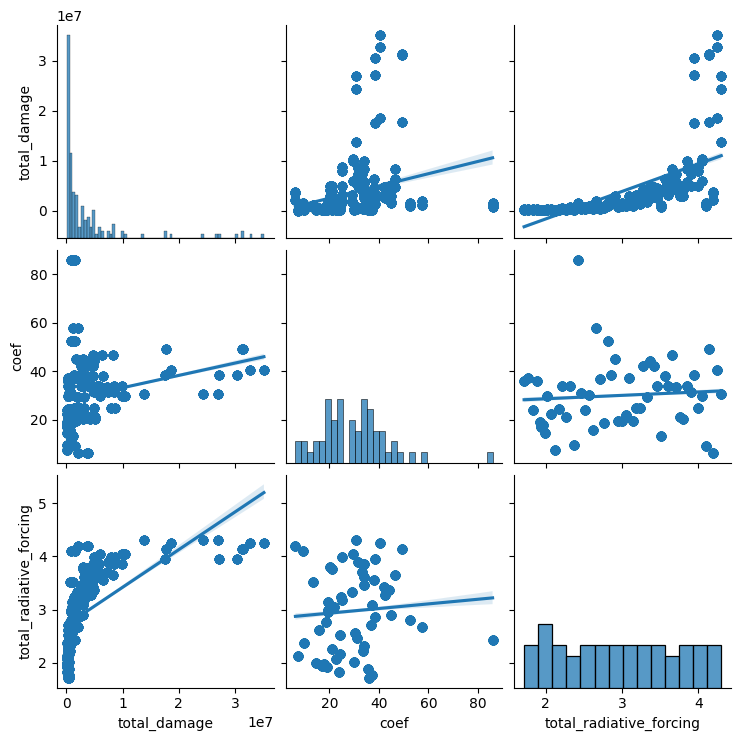

In [130]:
sns.pairplot(df_regression[['total_damage', 'coef', 'total_radiative_forcing']], kind='reg')

Here, I am trying to make the relationship between the radiative forcing and the total damage linear by taking the log of it.

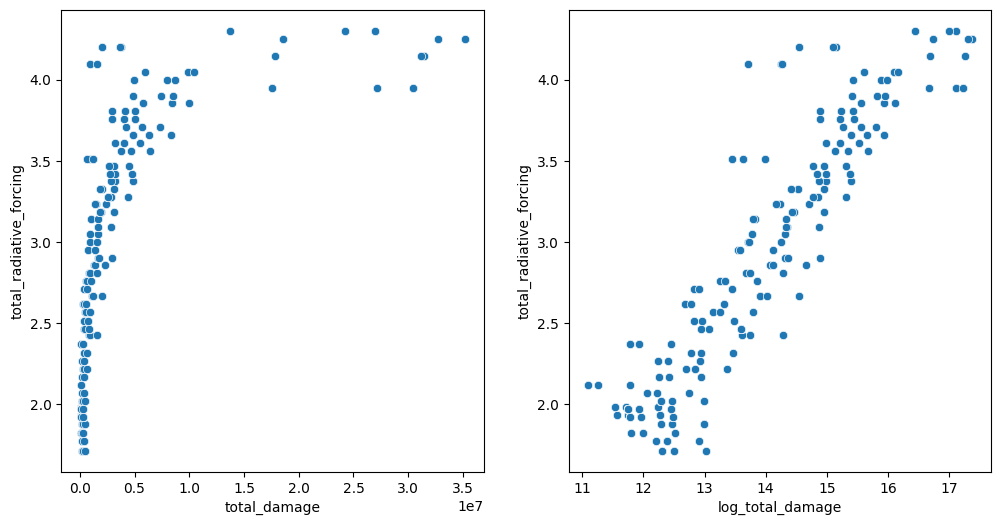

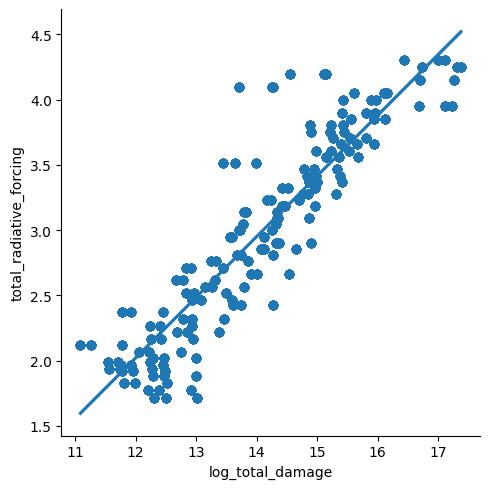

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))



df_regression['log_total_damage'] = np.log(df_regression['total_damage'])
sns.scatterplot(data=df_regression, y='total_radiative_forcing', x='total_damage', ax=ax[0])
sns.scatterplot(data=df_regression, y='total_radiative_forcing', x='log_total_damage', ax=ax[1])

sns.lmplot(data=df_regression, y='total_radiative_forcing', x='log_total_damage')


<Axes: xlabel='extra_extra_normalisation_constant', ylabel='total_damage'>

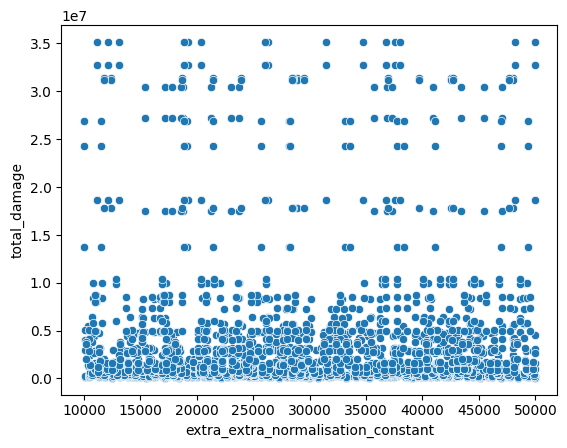

In [132]:
variable = 'extra_extra_normalisation_constant'

sns.scatterplot(data=df_regression, x=variable, y='total_damage')


#### Computing some logs for non-linear relationships

In [203]:
df_log = df_melted.copy()

# Drop negative values
df_log = df_log[df_log['total_damage'] > 0]
df_log = df_log.dropna()

df_log['log_gross_domestic_product_nominal'] = np.log(df_log['gross_domestic_product_nominal'])
df_log['log_temperature_change'] = np.log(df_log['temperature_change'])
df_log['log_coef'] = np.log(df_log['coef']) 


df_log['log_total_damage'] = np.log(df_log['total_damage'])


data = df_log

## Doing the regression

In [151]:
data.head()

,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,Run,temperature_change,gross_domestic_product_nominal,average_disposable_income_per_capita,equation,total_damage,log_gross_domestic_product_nominal
0,2005.0,BELGIUM,-2.120837,14345.919289,1.714491,0.484972,0,0.845,458081.623996,24767.399895,define_tot_eq_define_total_impact,455.259577,13.034803
1,2005.0,BULGARIA,-2.120837,14345.919289,1.714491,3.328578,0,0.845,49342.067424,4290.060541,define_tot_eq_define_total_impact,336.570307,10.806532
2,2005.0,CROATIA,-2.120837,14345.919289,1.714491,1.784685,0,0.845,49378.731850,7565.730576,define_tot_eq_define_total_impact,180.593082,10.807275
3,2005.0,CYPRUS,-2.120837,14345.919289,1.714491,0.828186,0,0.845,20251.576648,15217.411656,define_tot_eq_define_total_impact,34.370532,9.915988
4,2005.0,CZECH REPUBLIC,-2.120837,14345.919289,1.714491,1.306405,0,0.845,186259.756742,10050.031677,define_tot_eq_define_total_impact,498.650910,12.134898


In [134]:
df_melted.shape

(80055, 12)

### Explaining each region x time value by the choice of the model, temperature and the choice of the coefficient

Here, we test a very straight-forward model that explains the level of damage by a few straight-forward variables : 

$$

\text{Damage}_{t,r} = \beta_0 + \beta_1 \cdot GDP_{t,r} + \beta_2 \cdot \text{Temperature change} + \beta_3 \cdot coef_{t,r}
 
$$

By trials and mistake, we have come to the conclusion that using log_total_damage was a better use. In fact, it appears that this is just re-writting the same equation differently. 

$$

\begin{align*}
& D_{t,r} = f(\text{temperature}, \text{other drivers})_{t,r} \cdot GDP_{t,r} \cdot (\frac{y_{t,r}}{y_0})^\alpha \\
\iff  & D_{t,r} = \text{temperature}_{t,r}^{\beta_1} \cdot GDP_{t,r}^{\beta_2} \cdot \text{coef}^{\beta_3} \\
\iff & log(D_{t,r}) = log(\text{temperature}_{t,r}^{\beta_1} \cdot GDP_{t,r}^{\beta_2} \cdot \text{coef}^{\beta_3}) \\
\iff & log(D_{t,r}) = \beta_1 \cdot log(\text{temperature}_{t,r}) + \beta_2 \cdot log(GDP_{t,r}) + \beta_3 \cdot log(\text{coef})
\end{align*}

$$


In [204]:
regression_simple = sm.OLS(data['log_total_damage'], sm.add_constant(data[['log_temperature_change', 'log_coef', 'log_gross_domestic_product_nominal']])).fit()
regression_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_total_damage   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.294e+06
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:47:03   Log-Likelihood:                -7402.9
No. Observations:               71415   AIC:                         1.481e+04
Df Residuals:                   71411   BIC:                         1.485e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -5.5893      0.006   -876.726      0.000      -5.602      -5.577
log_temperature_change                 2.2738      0.004    648.482      0.000       2.267       2.281
log_coef                               0.9983      0.001   1159.131      0.000       0.997       1.000
log_gross_domestic_product_nominal     1.0016      0.000   2092.325      0.000       1.001       1.003
==============================================================================
Omnibus:                   411603.444   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8553.824
Skew:                           0.377   Prob(JB):                         0.00
Kurtosis:                       1.482   Cond. No.                         87.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
data['total_damage'].corr(data['coef'])

0.19416516782683838

<Axes: xlabel='log_gross_domestic_product_nominal', ylabel='log_total_damage'>

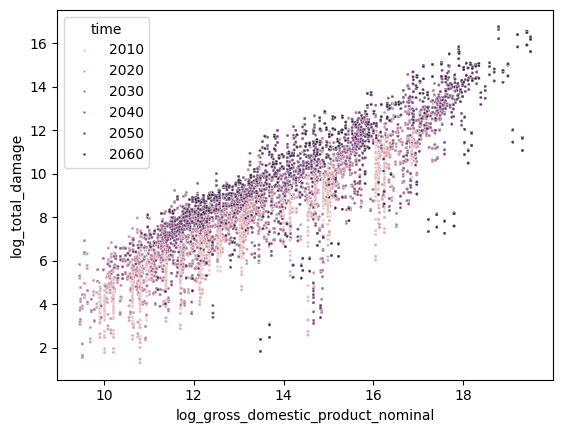

In [201]:
sns.scatterplot(data=data, x='log_gross_domestic_product_nominal', y='log_total_damage', hue='time', s=3)

### Without the equation dummies

In [135]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
#df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=False)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage', 'REGIONS 35 I', 'equation', 'coef'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     1172.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:16:14   Log-Likelihood:                -41233.
No. Observations:                2520   AIC:                         8.248e+04
Df Residuals:                    2511   BIC:                         8.254e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -6.595e+08    2.6e+08     -2.540      0.011   -1.17e+09    -1.5e+08
time                                  3.373e+05   1.32e+05      2.558      0.011    7.87e+04    5.96e+05
extra_extra_exponent                 -1.471e+05   6.08e+04     -2.421      0.016   -2.66e+05    -2.8e+04
extra_extra_normalisation_constant     -12.0493      5.421     -2.223      0.026     -22.679      -1.420
total_radiative_forcing              -1.218e+07   2.84e+06     -4.296      0.000   -1.77e+07   -6.62e+06
Run                                   -320.2881    446.436     -0.717      0.473   -1195.708     555.131
temperature_change                    8.044e+04   1.31e+04      6.159      0.000    5.48e+04    1.06e+05
gross_domestic_product_nominal           0.1419      0.003     55.278      0.000       0.137       0.147
average_disposable_income_per_capita   -15.4955      0.348    -44.536      0.000     -16.178     -14.813
==============================================================================
Omnibus:                      533.953   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5897.620
Skew:                           0.675   Prob(JB):                         0.00
Kurtosis:                      10.372   Cond. No.                     1.06e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

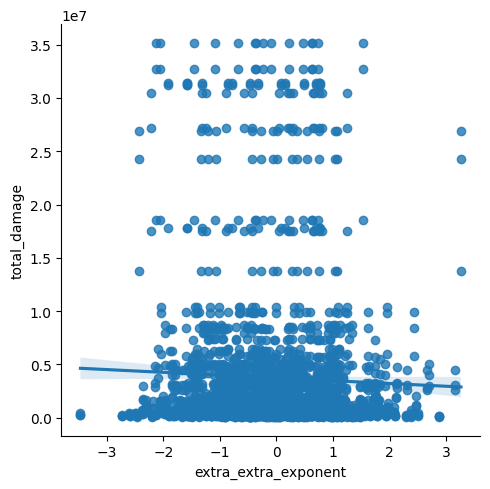

In [136]:
sns.lmplot(data=df_regression, x='extra_extra_exponent', y='total_damage')

### Without countries as dummy

In [137]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage', 'REGIONS 35 I'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1171.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:16:14   Log-Likelihood:                -40907.
No. Observations:                2520   AIC:                         8.184e+04
Df Residuals:                    2508   BIC:                         8.191e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                        -8.855e+08   2.28e+08     -3.877      0.000   -1.33e+09   -4.38e+08
time                                           4.51e+05   1.16e+05      3.887      0.000    2.24e+05    6.79e+05
extra_extra_exponent                         -1.084e+05   5.34e+04     -2.029      0.043   -2.13e+05   -3642.177
extra_extra_normalisation_constant              -5.6797      4.773     -1.190      0.234     -15.039       3.679
total_radiative_forcing                      -1.518e+07    2.5e+06     -6.081      0.000   -2.01e+07   -1.03e+07
coef                                          9.394e+04   4134.482     22.721      0.000    8.58e+04    1.02e+05
Run                                            -67.2826    392.552     -0.171      0.864    -837.042     702.477
temperature_change                            1.002e+05   1.15e+04      8.706      0.000    7.76e+04    1.23e+05
gross_domestic_product_nominal                   0.1333      0.002     58.262      0.000       0.129       0.138
average_disposable_income_per_capita           -13.9007      0.314    -44.303      0.000     -14.516     -13.285
equation_dice_tot_eq_dice_total_impact       -1.342e+06   1.33e+05    -10.109      0.000    -1.6e+06   -1.08e+06
equation_witness_tot_eq_witness_total_impact  6.083e+05   1.33e+05      4.583      0.000    3.48e+05    8.69e+05
==============================================================================
Omnibus:                      454.134   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3582.364
Skew:                           0.626   Prob(JB):                         0.00
Kurtosis:                       8.705   Cond. No.                     1.06e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
df_regression

,time,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,REGIONS 35 I,coef,Run,temperature_change,gross_domestic_product_nominal,average_disposable_income_per_capita,total_damage,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact
0,2005.0,-2.499737,37291.354076,1.714491,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,35.992621,364,23.660000,6.946382e+07,4.609016e+05,2.210159e+05,False,False
1,2005.0,-2.499737,37291.354076,1.714491,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,35.992621,364,23.660000,6.946382e+07,4.609016e+05,2.669876e+05,True,False
2,2005.0,-2.499737,37291.354076,1.714491,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,35.992621,364,23.660000,6.946382e+07,4.609016e+05,4.511240e+05,False,True
3,2005.0,-2.483093,48301.730067,1.714491,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,35.992621,224,23.660000,6.946382e+07,4.609016e+05,2.210159e+05,False,False
4,2005.0,-2.483093,48301.730067,1.714491,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,35.992621,224,23.660000,6.946382e+07,4.609016e+05,2.669876e+05,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2060.0,1.071663,33617.864179,4.301696,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,30.702805,35,80.555617,7.187911e+08,4.298371e+06,1.373452e+07,True,False
2516,2060.0,1.071663,33617.864179,4.301696,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,30.702805,35,80.555617,7.187911e+08,4.298371e+06,2.425469e+07,False,True
2517,2060.0,3.259974,18841.706602,4.301696,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,30.702805,385,80.555617,7.187911e+08,4.298371e+06,2.691910e+07,False,False
2518,2060.0,3.259974,18841.706602,4.301696,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,30.702805,385,80.555617,7.187911e+08,4.298371e+06,1.373452e+07,True,False


### With countries as dummy

In [139]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation', 'REGIONS 35 I'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     2217.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:16:15   Log-Likelihood:            -1.1605e+06
No. Observations:               80055   AIC:                         2.321e+06
Df Residuals:                   80009   BIC:                         2.322e+06
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         7.927e+06   6.47e+06      1.226      0.220   -4.75e+06    2.06e+07
time                                         -3913.1080   3282.913     -1.192      0.233   -1.03e+04    2521.381
extra_extra_exponent                          -371.3995   1662.053     -0.223      0.823   -3629.013    2886.214
extra_extra_normalisation_constant              -0.1548      0.149     -1.040      0.298      -0.447       0.137
total_radiative_forcing                      -5.479e+05   9.25e+04     -5.925      0.000   -7.29e+05   -3.67e+05
coef                                          1.329e+05   1805.450     73.636      0.000    1.29e+05    1.36e+05
Run                                             -3.9958    391.225     -0.010      0.992    -770.794     762.803
temperature_change                            1.068e+06   1.12e+05      9.575      0.000     8.5e+05    1.29e+06
gross_domestic_product_nominal                   0.0315      0.000    241.583      0.000       0.031       0.032
average_disposable_income_per_capita             0.2993      0.036      8.308      0.000       0.229       0.370
equation_dice_tot_eq_dice_total_impact       -4.224e+04   4139.893    -10.203      0.000   -5.04e+04   -3.41e+04
equation_witness_tot_eq_witness_total_impact  1.915e+04   4139.893      4.625      0.000     1.1e+04    2.73e+04
REGIONS 35 I_BELGIUM                         -1.769e+05   1.62e+04    -10.902      0.000   -2.09e+05   -1.45e+05
REGIONS 35 I_BULGARIA                        -1.096e+05    1.6e+04     -6.863      0.000   -1.41e+05   -7.83e+04
REGIONS 35 I_CHINA                            -6.91e+05   1.77e+04    -39.033      0.000   -7.26e+05   -6.56e+05
REGIONS 35 I_CROATIA                         -9.551e+04   1.59e+04     -6.008      0.000   -1.27e+05   -6.44e+04
REGIONS 35 I_CYPRUS                          -1.006e+05   1.59e+04     -6.322      0.000   -1.32e+05   -6.94e+04
REGIONS 35 I_CZECH REPUBLIC                  -1.008e+05   1.59e+04     -6.337      0.000   -1.32e+05   -6.96e+04
REGIONS 35 I_DENMARK                         -1.704e+05   1.63e+04    -10.449      0.000   -2.02e+05   -1.38e+05
REGIONS 35 I_EASOC                           -5.551e+05   1.62e+04    -34.178      0.000   -5.87e+05   -5.23e+05
REGIONS 35 I_ESTONIA                         -9.472e+04   1.59e+04     -5.953      0.000   -1.26e+05   -6.35e+04
REGIONS 35 I_FINLAND                           -1.5e+05   1.62e+04     -9.273      0.000   -1.82e+05   -1.18e+05
REGIONS 35 I_FRANCE                          -1.851e+05    1.6e+04    -11.584      0.000   -2.16e+05   -1.54e+05
REGIONS 35 I_GERMANY                         -2.563e+05   1.68e+04    -15.282      0.000   -2.89e+05   -2.23e+05
REGIONS 35 I_GREECE             